In [2]:
import numpy as np
import pandas as pd
import time

In [56]:
def DM_high(frequency):
    if frequency<50.015:
        return 0
    elif frequency<50.1:
        return ((frequency-50.015)/0.085)*0.05
    elif frequency<50.2:
        return 0.05+((frequency-50.1)/0.1)*0.95
    else:
        return 1

In [62]:
#predict revenue from energy sales

#transform frequency data into EAC response data split between the three services

#load data
data = pd.read_csv('Data/Frequency/fnew-2024-4.csv')
condition_high = (data['f'] >= 50.015)
condition_low = (data['f'] <= 49.985)

data['DR High %'] = np.minimum(1,condition_high * (data['f']-50.015)/0.1985)
data['DR Low %'] = np.minimum(1,condition_low * (50.015-data['f'])/0.1985)

data['DM High %'] = data['f'].apply(DM_high)

data


,dtm,f,DR High %,DR Low %,DM High %
0,2024-04-01 00:00:00,50.099,0.423174,-0.0,0.049412
1,2024-04-01 00:00:01,50.089,0.372796,-0.0,0.043529
2,2024-04-01 00:00:02,50.074,0.297229,-0.0,0.034706
3,2024-04-01 00:00:03,50.062,0.236776,-0.0,0.027647
4,2024-04-01 00:00:04,50.054,0.196474,-0.0,0.022941
...,...,...,...,...,...
2591995,2024-04-30 23:59:55,50.032,0.085642,-0.0,0.010000
2591996,2024-04-30 23:59:56,50.034,0.095718,-0.0,0.011176
2591997,2024-04-30 23:59:57,50.032,0.085642,-0.0,0.010000
2591998,2024-04-30 23:59:58,50.032,0.085642,-0.0,0.010000


<Axes: >

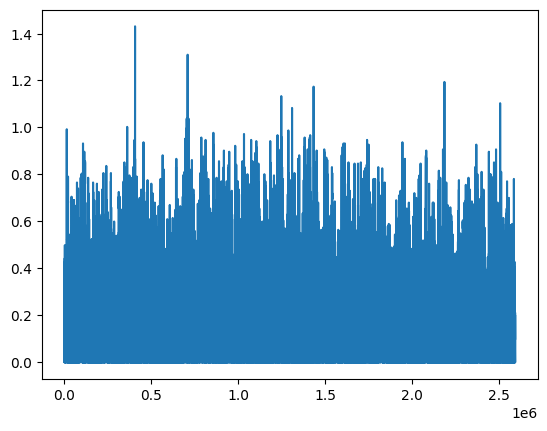

In [38]:
data['DC High %'].plot()